## Step 3 - Climate Analysis and Exploration

You are now ready to use Python and SQLAlchemy to do basic climate analysis and data exploration on your new weather station tables. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

* Create a Jupyter Notebook file called `climate_analysis.ipynb` and use it to complete your climate analysis and data exporation.

* Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

* Use SQLAlchemy `create_engine` to connect to your sqlite database.

* Use SQLAlchemy `automap_base()` to reflect your tables into classes and save a reference to those classes called `Station` and `Measurement`.

### Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

### Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.



### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

In [2]:
# Import SQLAlchemy and other dependencies
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
import datetime as dt
import pandas as pd
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt
from sqlalchemy import Column, Integer, String, Float, Text, ForeignKey
import numpy as np

In [3]:
# Create engine using the `hawaii.sqlite` database 
engine = create_engine("sqlite:///hawaii.sqlite")
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

In [4]:
# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [5]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
inspector.get_table_names()

['measurement', 'station']

In [6]:
# Use `engine.execute` to select and display the first 10 rows from the table

engine.execute('SELECT * FROM measurement LIMIT 20').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65),
 (2, 'USC00519397', '2010-01-02', 0.0, 63),
 (3, 'USC00519397', '2010-01-03', 0.0, 74),
 (4, 'USC00519397', '2010-01-04', 0.0, 76),
 (5, 'USC00519397', '2010-01-07', 0.06, 70),
 (6, 'USC00519397', '2010-01-08', 0.0, 64),
 (7, 'USC00519397', '2010-01-09', 0.0, 68),
 (8, 'USC00519397', '2010-01-10', 0.0, 73),
 (9, 'USC00519397', '2010-01-11', 0.01, 64),
 (10, 'USC00519397', '2010-01-12', 0.0, 61),
 (11, 'USC00519397', '2010-01-14', 0.0, 66),
 (12, 'USC00519397', '2010-01-15', 0.0, 65),
 (13, 'USC00519397', '2010-01-16', 0.0, 68),
 (14, 'USC00519397', '2010-01-17', 0.0, 64),
 (15, 'USC00519397', '2010-01-18', 0.0, 72),
 (16, 'USC00519397', '2010-01-19', 0.0, 66),
 (17, 'USC00519397', '2010-01-20', 0.0, 66),
 (18, 'USC00519397', '2010-01-21', 0.0, 69),
 (19, 'USC00519397', '2010-01-22', 0.0, 67),
 (20, 'USC00519397', '2010-01-23', 0.0, 67)]

In [7]:
# Reflect Database into ORM class
Station = Base.classes.station
Measurement = Base.classes.measurement

In [8]:
# Start a session to query the database
session = Session(engine)

# Precipitation Analysis
* Design a query to retrieve the last 12 months of precipitation data.

* Select only the `date` and `prcp` values.

* Load the query results into a Pandas DataFrame and set the index to the date column.

* Plot the results using the DataFrame `plot` method.

* Use Pandas to print the summary statistics for the precipitation data.

In [9]:
#Grab the latest date in database

latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()


year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

latest_date 

('2017-08-23')

In [10]:
last_12 = session.query(Measurement.date,Measurement.prcp).\
    filter (Measurement.date > year_ago).all()

In [11]:
# Change the data type of 'date', from string to timestamp
prcp_df = pd.DataFrame(last_12)
type(prcp_df['date'][0])
prcp_df['date']=pd.to_datetime(prcp_df['date'])

In [12]:
# confirm data type of 'date' 
type(prcp_df['date'][0])


pandas._libs.tslib.Timestamp

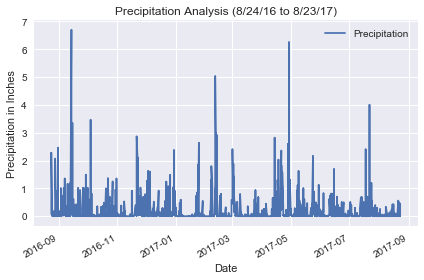

In [13]:
prcp_df.plot('date', 'prcp')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("Precipitation Analysis (8/24/16 to 8/23/17)")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()


In [14]:
prcp_df = pd.DataFrame(last_12)

prcp_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [15]:
prcp_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Station Analysis
* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

  * List the stations and observation counts in descending order

  * Which station has the highest number of observations?

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

  * Filter by the station with the highest number of observations.

  * Plot the results as a histogram with `bins=12`.

  



In [16]:
# Count how many stations in total
stations=session.query(Measurement).group_by(Measurement.station).count()
print("There are {} stations.".format(stations))

There are 9 stations.


In [17]:
observation_count=engine.execute('SELECT station,COUNT(tobs) FROM measurement GROUP BY station ORDER BY COUNT(tobs) DESC ').fetchall()

observation_count

print("The station",observation_count[0][0],"has the highest number of observations",",","which is",observation_count[0][1],".")

The station USC00519281 has the highest number of observations , which is 2772 .


In [18]:
tobs = session.query(Measurement.date,Measurement.station,Measurement.tobs).\
              filter(Measurement.station=="USC00519281").\
              filter(Measurement.date > year_ago).all()
             
tobs
              

[('2016-08-24', 'USC00519281', 77),
 ('2016-08-25', 'USC00519281', 80),
 ('2016-08-26', 'USC00519281', 80),
 ('2016-08-27', 'USC00519281', 75),
 ('2016-08-28', 'USC00519281', 73),
 ('2016-08-29', 'USC00519281', 78),
 ('2016-08-30', 'USC00519281', 77),
 ('2016-08-31', 'USC00519281', 78),
 ('2016-09-01', 'USC00519281', 80),
 ('2016-09-02', 'USC00519281', 80),
 ('2016-09-03', 'USC00519281', 78),
 ('2016-09-04', 'USC00519281', 78),
 ('2016-09-05', 'USC00519281', 78),
 ('2016-09-06', 'USC00519281', 73),
 ('2016-09-07', 'USC00519281', 74),
 ('2016-09-08', 'USC00519281', 80),
 ('2016-09-09', 'USC00519281', 79),
 ('2016-09-10', 'USC00519281', 77),
 ('2016-09-11', 'USC00519281', 80),
 ('2016-09-12', 'USC00519281', 76),
 ('2016-09-13', 'USC00519281', 79),
 ('2016-09-14', 'USC00519281', 75),
 ('2016-09-15', 'USC00519281', 79),
 ('2016-09-16', 'USC00519281', 78),
 ('2016-09-17', 'USC00519281', 79),
 ('2016-09-18', 'USC00519281', 78),
 ('2016-09-19', 'USC00519281', 78),
 ('2016-09-20', 'USC00519281

In [19]:
# put the tobs data to data frame
tobs_df=pd.DataFrame(tobs)
tobs_df.head()

,date,station,tobs
0,2016-08-24,USC00519281,77
1,2016-08-25,USC00519281,80
2,2016-08-26,USC00519281,80
3,2016-08-27,USC00519281,75
4,2016-08-28,USC00519281,73


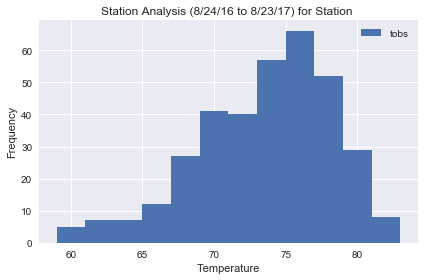

In [20]:
#plot the tobs data
tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature")
plt.title("Station Analysis (8/24/16 to 8/23/17) for Station ")
plt.legend(["tobs"])
plt.tight_layout()
plt.show()

### Temperature Analysis

* Write a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.

* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e. use "2017-01-01" if your trip start date was "2018-01-01")

* Plot the min, avg, and max temperature from your previous query as a bar chart.

  * Use the average temperature as the bar height.

  * Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).



In [33]:
def calc_temps(start_date, end_date):
  
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# Test the function
temp_range = (calc_temps('2016-09-28', '2016-10-05'))

print(temp_range)
list(np.ravel(temp_range))

  

[(73, 78.26, 82)]


[73.0, 78.26, 82.0]

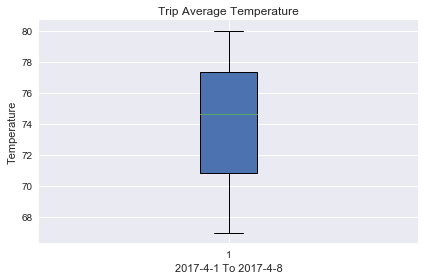

In [29]:
# plotting the data as a boxplot
star_date=dt.date(2017,4,1)
end_date=dt.date(2017,4,8)
min_avg_max=calc_temps(star_date,end_date)
fig, ax = plt.subplots()
x = range(len(min_avg_max))
ax.boxplot(min_avg_max, patch_artist=True)
ax.set_title('Trip Average Temperature')
ax.set_ylabel("Temperature")
ax.set_xlabel("2017-4-1 To 2017-4-8")
fig.tight_layout()
plt.show()